In [1]:
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import olympus
from olympus.campaigns import Campaign

In [2]:
# suzuki dataset
camps_random = pickle.load(open('suzuki_random.pkl', 'rb'))
camps_botorch = pickle.load(open('suzuki_botorch.pkl', 'rb'))

print('RANDOM : ', len(camps_random))
print('BOTORCH : ', len(camps_botorch))

RANDOM :  40
BOTORCH :  40


In [3]:
vals_random = np.array([np.maximum.accumulate(c.values) for c in camps_random])
mean_random = np.mean(vals_random, axis=0)
stderr_random = np.std(vals_random, axis=0)

vals_botorch = np.array([np.maximum.accumulate(c.values) for c in camps_botorch])
mean_botorch = np.mean(vals_botorch, axis=0)
stderr_botorch = np.std(vals_botorch, axis=0)

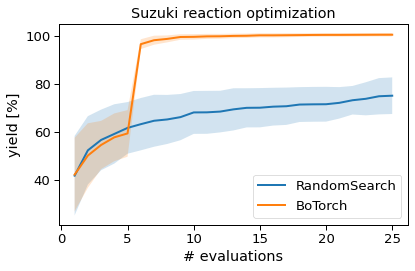

In [8]:
evals = np.arange(25)+1

plt.plot(evals, mean_random, lw=2, label='RandomSearch')
plt.fill_between(
    evals, 
    mean_random+stderr_random,
    mean_random-stderr_random,
    alpha=0.2,
) 

plt.plot(evals, mean_botorch, lw=2, label='BoTorch')
plt.fill_between(
    evals, 
    mean_botorch+stderr_botorch,
    mean_botorch-stderr_botorch,
    alpha=0.2,
) 

plt.legend(loc='lower right')
plt.xlabel('# evaluations')
plt.ylabel('yield [%]')
plt.title('Suzuki reaction optimization')

plt.tight_layout()
plt.savefig('suzuki_results.png', dpi=1000)

In [5]:
# perovskites dataset
camps_random = pickle.load(open('perovskites_random.pkl', 'rb'))
camps_botorch_naive = pickle.load(open('perovskites_botorch_naive.pkl', 'rb'))
camps_botorch_desc = pickle.load(open('perovskites_botorch_descriptors.pkl', 'rb'))

print('RANDOM : ', len(camps_random))
print('BOTORCH NAIVE : ', len(camps_botorch_naive))
print('BOTORCH DESC : ', len(camps_botorch_desc))

RANDOM :  40
BOTORCH NAIVE :  40
BOTORCH DESC :  40


In [10]:
num_evals_random = [c.values.shape[0] for c in camps_random]
num_evals_botorch_naive = [c.values.shape[0] for c in camps_botorch_naive]
num_evals_botorch_desc = [c.values.shape[0] for c in camps_botorch_desc]
names = ['RandomSearch' for _ in range(40)] + ['BoTorch (OHE)' for _ in range(40)] +  ['BoTorch (Desc)' for _ in range(40)]
num_evals = num_evals_random + num_evals_botorch_naive + num_evals_botorch_desc

df = pd.DataFrame({'planner': names, 'num_evals': num_evals})

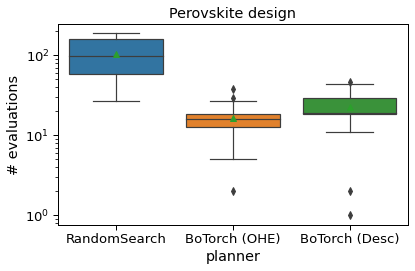

In [11]:
sns.boxplot(data=df, x='planner', y='num_evals', showmeans=True)
plt.yscale('log')
plt.xlabel('planner')
plt.ylabel('# evaluations')
plt.title('Perovskite design')

plt.tight_layout()
plt.savefig('perovskites_results.png', dpi=1000)